In [5]:
import tensorflow as tf
tf.__version__ 

'2.9.2'

In [27]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

train_Path = './train/'
test_Path = './test/'
IMAGE_SIZE = [224, 224]

resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

for layer in resnet.layers:
    layer.trainable = False

folders = glob(train_Path + '/*')
folders

car_label = ['NeuralTextures','Deepfakes','Face2Face','FaceSwap']



In [28]:
folders

['./train/NeuralTextures',
 './train/Deepfakes',
 './train/Face2Face',
 './train/FaceSwap']

In [32]:
x = Flatten() (resnet.output)
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = resnet.input, outputs = prediction)
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [33]:
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 100,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-33-6573276b899a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
50/50 [==============================] - 48s 892ms/step - loss: 3.4224 - accuracy: 0.2544 - val_loss: 2.0233 - val_accuracy: 0.2688
Epoch 2/100
50/50 [==============================] - 43s 858ms/step - loss: 1.8854 - accuracy: 0.2450 - val_loss: 1.6794 - val_accuracy: 0.2488
Epoch 3/100
50/50 [==============================] - 42s 838ms/step - loss: 1.9934 - accuracy: 0.2556 - val_loss: 2.4293 - val_accuracy: 0.2725
Epoch 4/100
50/50 [==============================] - 41s 832ms/step - loss: 2.1249 - accuracy: 0.2369 - val_loss: 1.4992 - val_accuracy: 0.2612
Epoch 5/100
50/50 [==============================] - 42s 839ms/step - loss: 1.6760 - accuracy: 0.2419 - val_loss: 1.5989 - val_accuracy: 0.2562
Epoch 6/100
50/50 [==============================] - 42s 847ms/step - loss: 2.1944 - accuracy: 0.2506 - val_loss: 3.3564 - val_accuracy: 0.2488
Epoch 7/100
50/50 [==============================] - 42s 836ms/step - loss: 2.2733 - accuracy: 0.2637 - val_loss: 2.2661 - val_accuracy:

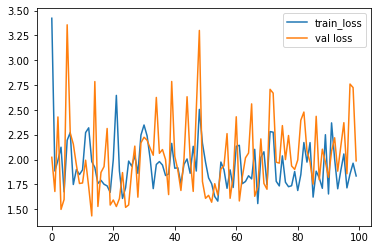

In [34]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

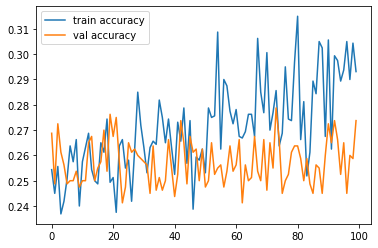

In [35]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()

In [38]:
#accuracy-30%
prediction = model.predict(test_set)

25/25 [==============================] - 14s 567ms/step
